In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import demography as dm

In [51]:
#Colocando os dados em suas respectivas variáveis
ambos_sexos = pd.read_csv('data/data_life_bs.csv')
feminino = pd.read_csv('data/data_life_f.csv')
masculino = pd.read_csv('data/data_life_m.csv')
populacao = pd.read_csv('data/data_pop.csv')
populacao.columns = ['Year', 'Age', 'Feminino', 'Masculino', 'Total']

In [95]:
def dados_para_tx_anual(intervalo):
    ultimo_ano = populacao['Year'].iloc[-1]
    lista_tot = []
    lista_fem = []
    lista_mas = []
    lista_ano = []
    for c in range(0, intervalo+1):
        ano = ultimo_ano - intervalo + c
        lista_ano.append(ano)

        soma_pop_tot = sum(populacao[populacao['Year'] == ano]['Total'])
        lista_tot.append(soma_pop_tot)

        soma_pop_fem = sum(populacao[populacao['Year'] == ano]['Feminino'])
        lista_fem.append(soma_pop_fem)

        soma_pop_mas = sum(populacao[populacao['Year'] == ano]['Masculino'])
        lista_mas.append(soma_pop_mas)
    
    dict_tot = {'ano': lista_ano,'fem': lista_fem, 'mas':lista_mas, 'pop_tot': lista_tot}
    return pd.DataFrame(dict_tot)

def tx_cresc_anual(v):
    lista_tx_fem = []
    lista_tx_mas = []
    lista_tx_tot = []
    ano = []
    for c in range(0, len(v['ano'])-1):
        ano.append(f'{v["ano"][c]}-{v["ano"][c+1]}')
        tx_fem = (v['fem'][c+1]/v['fem'][c])-1
        lista_tx_fem.append(tx_fem)
        tx_mas = (v['mas'][c+1]/v['mas'][c])-1
        lista_tx_mas.append(tx_mas)
        tx_tot = (v['pop_tot'][c+1]/v['pop_tot'][c])-1
        lista_tx_tot.append(tx_tot)
    dict_tx = {'ano': ano, 'tx_fem': lista_tx_fem, 'tx_mas': lista_tx_mas, 'tx_tot': lista_tx_tot}
    return pd.DataFrame(dict_tx)
    

In [113]:
dados_tx = dados_para_tx_anual(5)
tx_anual = tx_cresc_anual(dados_tx)

In [114]:
dados_tx

,ano,fem,mas,pop_tot
0,2011,3887879.94,3807281.29,7695161.23
1,2012,3957680.53,3878681.93,7836362.46
2,2013,4031037.00,3953345.02,7984382.02
3,2014,4105179.19,4029239.73,8134418.92
4,2015,4185660.27,4111197.61,8296857.88
5,2016,4268202.77,4195138.77,8463341.54


In [115]:
tx_anual

,ano,tx_fem,tx_mas,tx_tot
0,2011-2012,0.017953,0.018754,0.018349
1,2012-2013,0.018535,0.019250,0.018889
2,2013-2014,0.018393,0.019198,0.018791
3,2014-2015,0.019605,0.020341,0.019969
4,2015-2016,0.019720,0.020418,0.020066


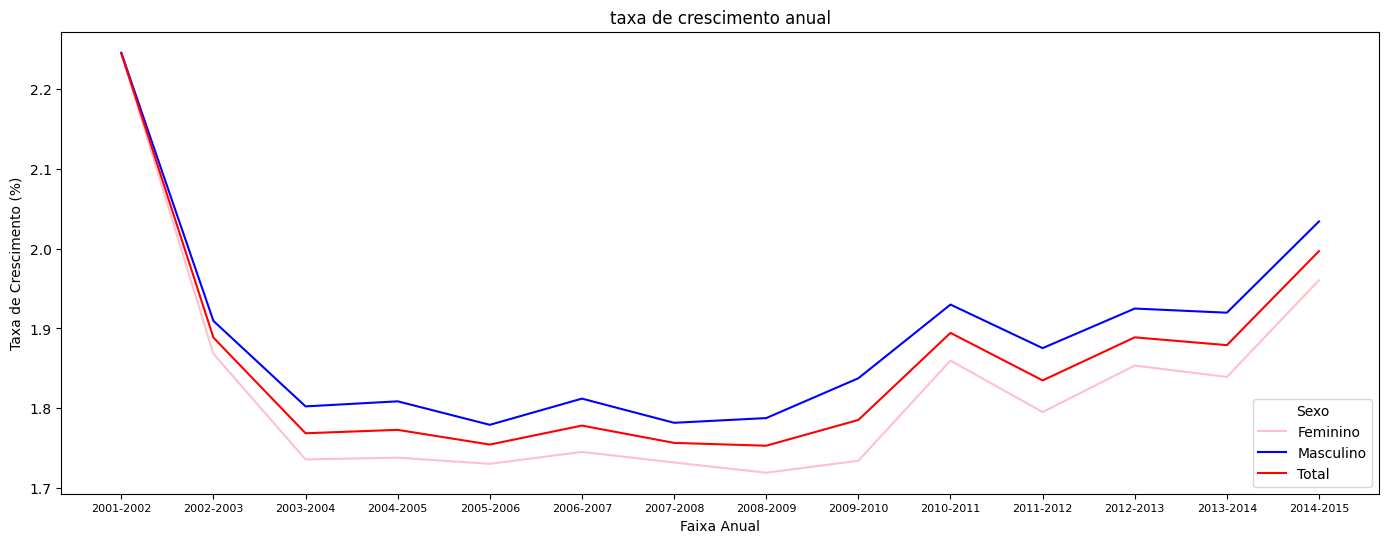

In [86]:
plt.figure(figsize=(17, 6))
plt.grid(False)
plt.title(f'taxa de crescimento anual')
plt.xlabel('Faixa Anual')
plt.ylabel('Taxa de Crescimento (%)')
plt.plot(tx_anual['ano'], tx_anual['tx_fem']*100, linestyle='-', color='pink', label='Feminino')
plt.plot(tx_anual['ano'], tx_anual['tx_mas']*100, linestyle='-', color='b', label='Masculino')
plt.plot(tx_anual['ano'], tx_anual['tx_tot']*100, linestyle='-', color='r', label='Total')
plt.legend(title='Sexo', loc='lower right')
plt.tick_params(axis='x', labelsize=8)
plt.show()

In [111]:
def tx_de_crescimento(ano_1, ano_2):
    ano_inicial = populacao[populacao['Year'] == ano_1]
    ano_final = populacao[populacao['Year'] == ano_2]
    
    pop_fem_inicial = sum(ano_inicial['Feminino'])
    pop_fem_final = sum(ano_final['Feminino'])
    tx_fem_linear = (1/(ano_2-ano_1))*((pop_fem_final - pop_fem_inicial)/pop_fem_inicial)
    tx_fem_geo = ((pop_fem_final/pop_fem_inicial)**(1/(ano_2-ano_1))) - 1

    pop_mas_inicial = sum(ano_inicial['Masculino'])
    pop_mas_final = sum(ano_final['Masculino'])
    tx_mas_linear = (1/(ano_2-ano_1))*((pop_mas_final - pop_mas_inicial)/pop_mas_inicial)
    tx_mas_geo = ((pop_mas_final/pop_mas_inicial)**(1/(ano_2-ano_1))) - 1

    pop_tot_inicial = sum(ano_inicial['Total'])
    pop_tot_final = sum(ano_final['Total'])
    tx_tot_linear = (1/(ano_2-ano_1))*((pop_tot_final - pop_tot_inicial)/pop_tot_inicial)
    tx_tot_geo = ((pop_tot_final/pop_tot_inicial)**(1/(ano_2-ano_1))) - 1

    
    


    data_linear = pd.DataFrame({'Sexo': ['Feminino', 'Masculino', 'Total'], f'Pop_{ano_1}': [pop_fem_inicial, pop_mas_inicial, pop_tot_inicial], f'Pop_{ano_2}': [pop_fem_final, pop_mas_final, pop_tot_final], 'Taxa Nominal': [tx_fem_linear, tx_mas_linear, tx_tot_linear], 'Geometrica': [tx_fem_geo, tx_mas_geo, tx_tot_geo]})


    
    return data_linear

In [112]:
taxas_cres = tx_de_crescimento(1996, 2016)
taxas_cres

,Sexo,Pop_1996,Pop_2016,Taxa Nominal,Geometrica
0,Feminino,2847155.12,4268202.77,0.024956,0.020450
1,Masculino,2769803.02,4195138.77,0.025730,0.020974
2,Total,5616958.14,8463341.54,0.025337,0.020709


In [65]:
#função para filtrar a expectativa de vida por dataframe, qunatidade de anos e idades
def expec_vida(data, quant_anos, idade):
    years = list(map(lambda x: -x + data['Year'].max(), range(0, quant_anos)))
    expec = data[(data['Year'].isin(years)) & (data['Age'] == idade)][['Year', 'Age', 'ex']]
    return expec
#função para plotar a expectativa de vida
def plot_expec_vida(data1, data2, sexo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    ax1.grid(True)
    ax1.plot(data1['Year'], data1['ex'], linestyle='-', color='r', marker='o', label='Expectativa de Vida', linewidth=2, markersize=6, markerfacecolor='b', markeredgewidth=2, markeredgecolor='black')
    ax1.set_xlabel('Ano')
    ax1.set_ylabel('Expectativa de Vida')
    ax1.set_title(f'Expectativa de Vida ao nascer - {sexo}')

    ax2.grid(True)
    ax2.plot(data2['Year'], data2['ex'], linestyle='-', color='r', marker='o', label='Expectativa de Vida', linewidth=2, markersize=6, markerfacecolor='b', markeredgewidth=2, markeredgecolor='black')
    ax2.set_xlabel('Ano')
    ax2.set_ylabel('Expectativa de Vida')
    ax2.set_title(f'Expectativa de Vida aos 60 anos - {sexo}')

    plt.tight_layout()
    plt.show()

In [66]:
sexos_exp_0 = expec_vida(ambos_sexos, 20, 0)
sexos_exp_60 = expec_vida(ambos_sexos, 20, 60)
feminino_exp_0 = expec_vida(feminino, 20, 0)
feminino_exp_60 = expec_vida(feminino, 20, 60)
masculino_exp_0 = expec_vida(masculino, 20, 0)
masculino_exp_60 = expec_vida(masculino, 20, 60)


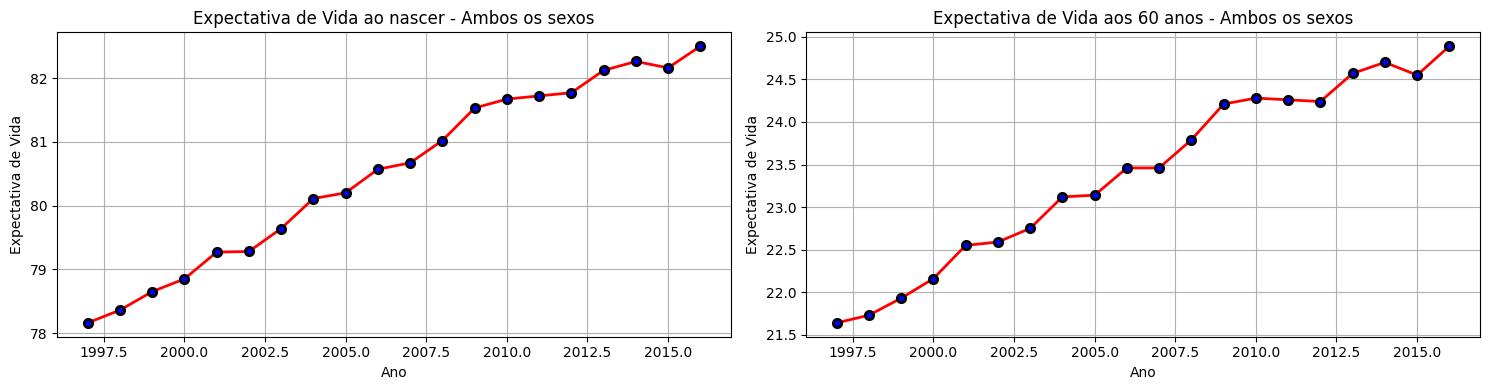

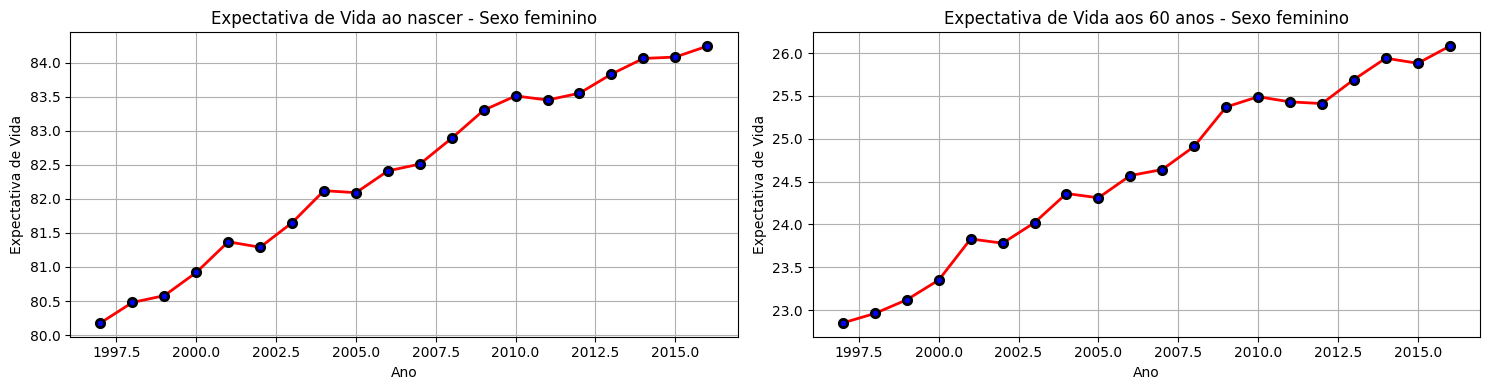

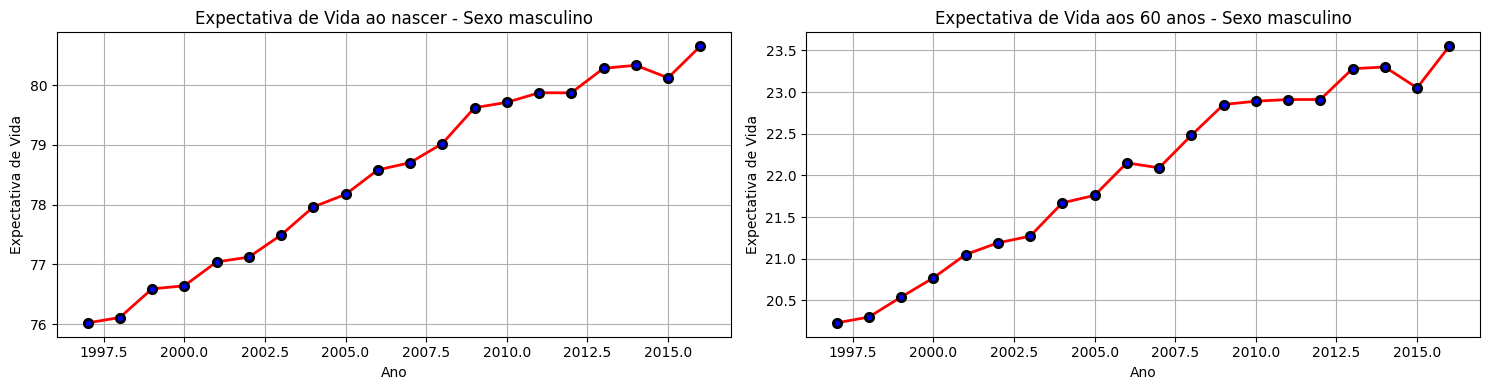

In [67]:
pl_exp_sexos = plot_expec_vida(sexos_exp_0, sexos_exp_60, 'Ambos os sexos')
pl_exp_fem = plot_expec_vida(feminino_exp_0, feminino_exp_60, 'Sexo feminino')
pl_exp_masc = plot_expec_vida(masculino_exp_0, masculino_exp_60, 'Sexo masculino')
pl_exp_sexos
pl_exp_fem
pl_exp_masc

In [68]:
#função para filtrar a probabilidade de morte por dataframe, quantidade de anos e intervalo de anos
def prob_mort_ano(data, quant_anos, intervalo):
    #definindo anos por intervalo de tempo
    years = list(map(lambda x: -x + data['Year'].max(), range(0, quant_anos, intervalo)))
    #definindo idades de 0 a 60 anos
    idade = list(map(lambda x: x, range(0, 61)))
    #extraindo probabilidades do dataframe filtrando por ano e idade definidas anteriormente
    probs = data[(data['Year'].isin(years)) & (data['Age'].isin(idade))][['Year', 'Age', 'qx']]
    return probs
#função para plotar a probabilidade de morte
def plot_prob_mort(data, sexo):
    years = data['Year'].unique()
    plt.figure(figsize=(17, 6))
    plt.grid(False)
    plt.title(f'Probabilidade de Morte em Relação a Idade - {sexo}')
    plt.xlabel('Idade')
    plt.ylabel('Probabilidade de Morte')
    plt.yscale('log')
    for year in years:
        plt.plot(data[data['Year'] == year]['Age'], data[data['Year'] == year]['qx'], linestyle='-', label=year, color=np.random.rand(3,))
    plt.legend(title='Anos', loc='lower right')
    plt.tick_params(axis='x', labelsize=8)
    plt.show()

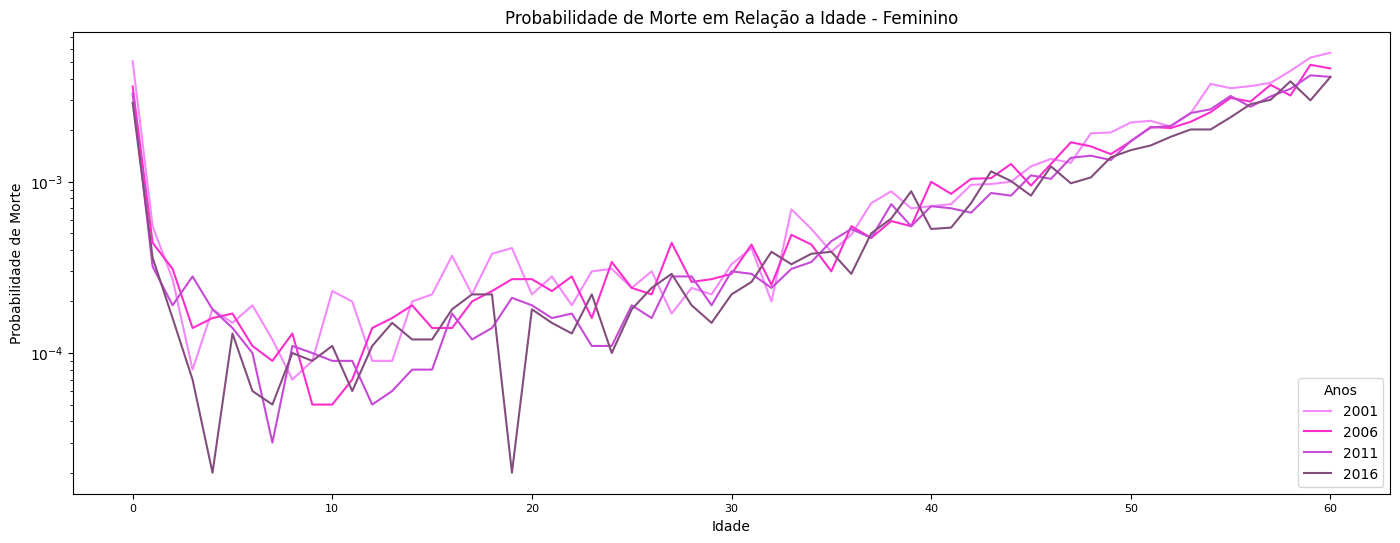

In [69]:
fem = prob_mort_ano(feminino, 20, 5)
prob_mort_fem = plot_prob_mort(fem, 'Feminino')
prob_mort_fem

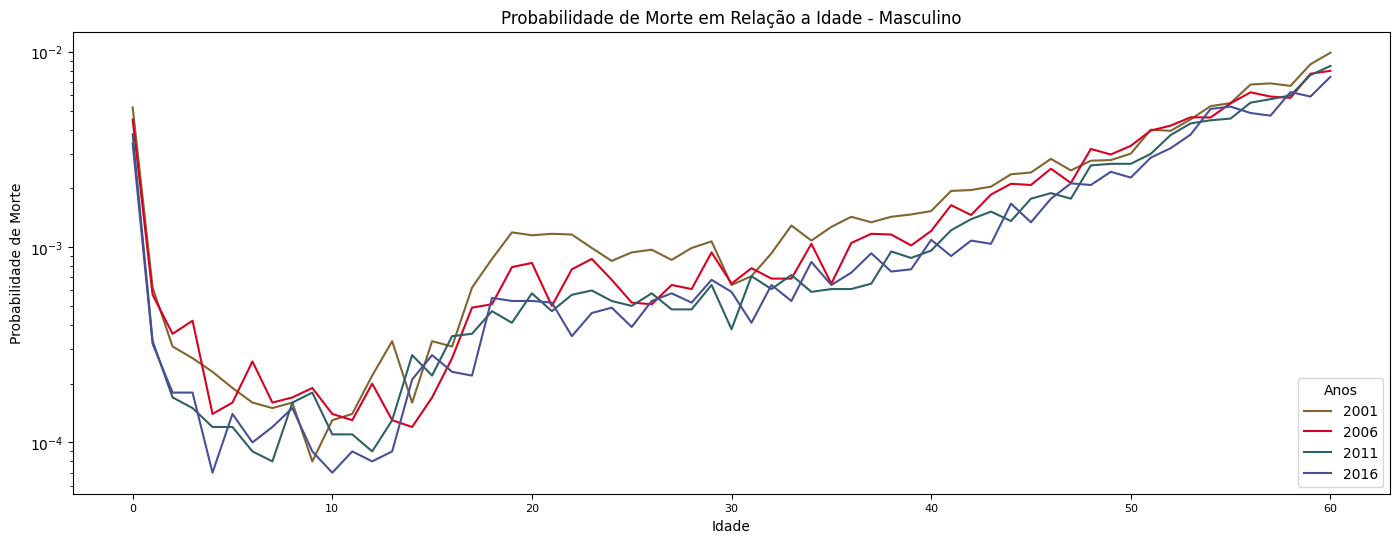

In [70]:
masc = prob_mort_ano(masculino, 20, 5)
prob_mort_masc = plot_prob_mort(masc, 'Masculino')
prob_mort_masc

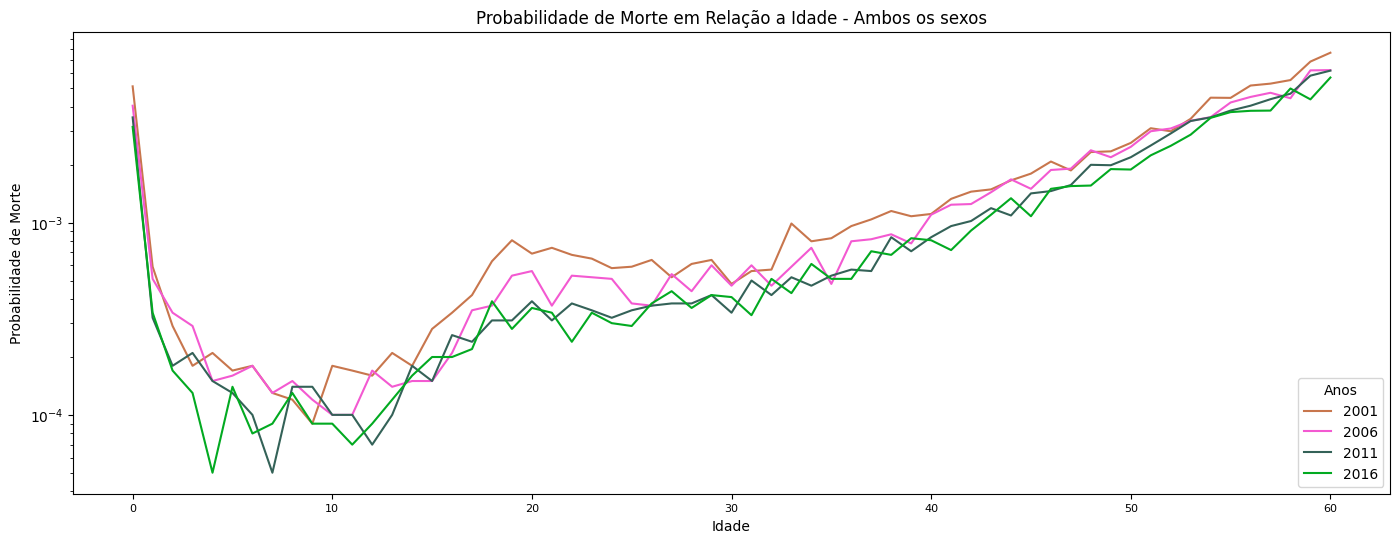

In [71]:
ambos_sex = prob_mort_ano(ambos_sexos, 20, 5)
prob_mort_sex = plot_prob_mort(ambos_sex, 'Ambos os sexos')
prob_mort_sex

In [72]:
#função para plotar a pirâmide etária
def plot_piramide_etaria(quant_ano, intervalo):
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    axs = axs.ravel()

    #definindo intervalo de idade
    idade = list(map(lambda x: x, range(0, len(populacao['Age'].unique()), intervalo)))
    #listando os anos
    years = list(map(lambda x: -x + populacao['Year'].max(), range(0, quant_ano, intervalo)))
    
    #dados para homens
    hm = (populacao[populacao['Year'].isin(years)][['Masculino', 'Age', 'Year']])
    hm = hm[hm['Age'].isin(idade)][['Masculino', 'Year']]
    #dados para mulheres
    fm = (populacao[populacao['Year'].isin(years)][['Feminino', 'Age', 'Year']])
    fm = fm[fm['Age'].isin(idade)][['Feminino', 'Year']]
    #plotando os gráficos em conjunto
    for c in range(0, len(years)):
        masc = hm[hm['Year'] == years[c]]['Masculino']
        fem = fm[fm['Year'] == years[c]]['Feminino']
        
        ax = axs[c]
        ax.barh(idade, masc, color='blue', label='Homens', height=3)
        ax.barh(idade, [-val for val in fem], color='pink', label='Mulheres', height=3)
        
        ax.set_yticks(idade)
        ax.set_xlabel('População')
        ax.set_title(f'Pirâmide Etária - {years[c]}')
        ax.legend()
        ax.tick_params(axis='y', labelsize=6)
        ax.grid(False)
        
        xlim = max(abs(ax.get_xlim()[0]), abs(ax.get_xlim()[1]))
        ax.set_xlim(-xlim, xlim)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

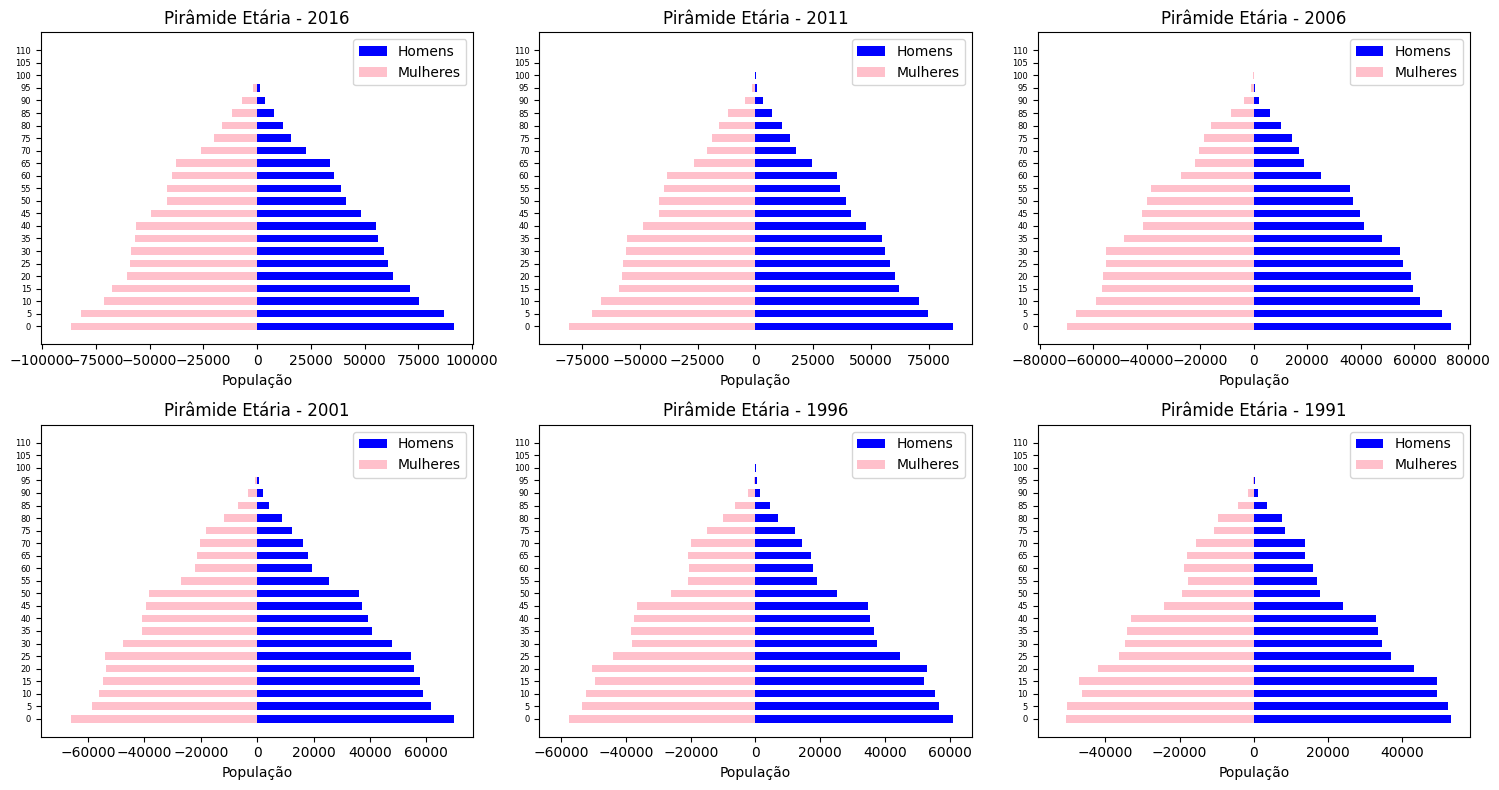

In [73]:
plot_piramide_etaria(30, 5)